In [ ]:
#Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [ ]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')  
training_set = dataset_train.iloc[:, 1:2].values  


In [ ]:
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"



# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_norm=sc.fit_transform(training_set)
len(training_set_norm)



1258

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_norm[i-60:i,0])
  y_train.append(training_set_norm[i])
X_train, y_train = np.array(X_train), np.array(y_train) #Because in keras the processings takes place through numpys only

In [ ]:
X_train.shape

(1198, 60)

In [ ]:
#reshaping
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

#Building the RNN


In [ ]:
# Importing the Keras libraries and packages  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [ ]:
# Initialising the RNN  
regressor = Sequential()
help(LSTM)

In [ ]:
#Creating layers
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2)) 
# Adding a second layer
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2)) 
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50, return_sequences = True))  
regressor.add(Dropout(0.2)) 
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units = 50))  
regressor.add(Dropout(0.2))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set  
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 115ms/step - loss: 0.0442
Epoch 2/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0057
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0050
Epoch 6/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0043
Epoch 13/100

#Making predictions and visualizing the data


In [52]:
# Getting the real stock price of 2017  
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')  
real_stock_price = dataset_test.iloc[:, 1:2].values 
real_stock_price
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [45]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [ ]:
dataset_total.head()


0    325.25
1    331.27
2    329.83
3    328.34
4    322.04
Name: Open, dtype: float64

In [46]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values  


In [47]:
inputs = inputs.reshape(-1,1)  


In [ ]:
inputs = sc.transform(inputs)  

In [48]:

X_test = []  
for i in range(60, 80):  
    X_test.append(inputs[i-60:i, 0])  
X_test = np.array(X_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  


In [49]:
predicted_stock_price = regressor.predict(X_test)  


In [50]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
#dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')  
predicted_stock_price

array([[1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0519],
       [1608.0521],
       [1608.0519],
       [1608.052 ],
       [1608.052 ],
       [1608.0521]], dtype=float32)

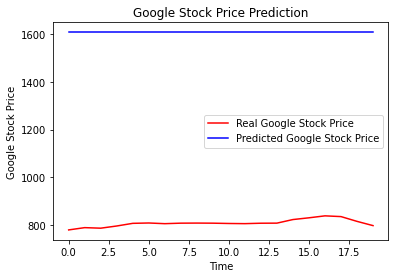

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  
plt.title('Google Stock Price Prediction')  
plt.xlabel('Time')  
plt.ylabel('Google Stock Price')  
plt.legend()  
plt.show()  
